In [31]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# -- References to Relevant Papers --
# [1] Pezzé & Smerzi, "Heisenberg-limited noisy atomic clock using a hybrid coherent and squeezed states protocol", Phys. Rev. A, 2020.
#     - Discusses the hybrid quantum-classical protocol for enhanced metrology using coherent and squeezed states.
#     - Relevant equations and concepts used in the time evolution and squeezing operations are found in Sections II and III of the paper. [41†source].
#
# [2] Hayes et al., "Making the most of time in quantum metrology: concurrent state preparation and sensing", Quantum Sci. Technol., 2018.
#     - Introduces the idea of accounting for preparation, sensing, and measurement times in metrology protocols.
#     - The concept of fixed total time and the trade-off between preparation, sensing, and measurement is covered on page 2. [42†source].
#
# [3] "Entanglement-enhanced quantum metrology: From standard quantum limit to Heisenberg limit" (Pezzé et al.), Rev. Mod. Phys., 2018.
#     - Describes Fisher Information, phase variance, and the use of entanglement to improve precision in quantum sensing.
#     - The scaling of Fisher Information with particle number and entanglement is introduced on page 6 of the paper. [42†source].
#



In [153]:
import numpy as np

# Constants
S = 20
chi = 6
mu = 0.199  # 2 * chi

# Define the A and B terms
A = 1 - (np.cos(mu) ** (2 * S - 2))
B = 4 * np.sin(mu / 2) * (np.cos( mu / 2) ** (2 * S - 2))

# Define the main expression for ⟨ΔS²ₓ⟩
delta_Sx_square = (S / 2) * (2 * S * (1 - np.cos(mu / 2)**(2*(2 * S - 1))) - (S - 0.5) * A)

# Output the formula and the result
print("The formula for ⟨ΔS²ₓ⟩ is:")
print("⟨ΔS²ₓ⟩ = S/2 * [2S(1 - cos²((2S - 1) * μ / 2)) - (S - 1/2) * A]")
print("Where:")
print("A = 1 - cos((2S - 2) * μ)")
print("B = 4 * sin(μ / 2) * cos((2S - 2) * μ / 2)")

# Output the result
print(f"\nFor S = {S} and μ = {mu}:")
print("The value of ⟨ΔS²ₓ⟩ is:", delta_Sx_square)

The formula for ⟨ΔS²ₓ⟩ is:
⟨ΔS²ₓ⟩ = S/2 * [2S(1 - cos²((2S - 1) * μ / 2)) - (S - 1/2) * A]
Where:
A = 1 - cos((2S - 2) * μ)
B = 4 * sin(μ / 2) * cos((2S - 2) * μ / 2)

For S = 20 and μ = 0.199:
The value of ⟨ΔS²ₓ⟩ is: 24.724124670111873


In [161]:
import numpy as np

mu = 0.199
S = 20
   
def calculate_Delta_Sz_squared(axis):
   # Given parameters
   
   # Calculating A, B, and delta
   A = 1 - (np.cos(mu) ** (2 * S - 2))
   B = 4 * np.sin(mu / 2) * (np.cos( mu / 2) ** (2 * S - 2))
   delta = 0.5 * np.arctan(B / A)
   v = np.pi/2 - delta
   # Calculating the main formula
   term1 = S / 2
   subterm1 = A
   subterm2 = np.sqrt(A**2 + B**2) * np.cos(2 * v + 2 * delta)
   subterm = subterm1 + subterm2
   if axis == 'z':
      subterm = subterm1 - subterm2
   term2 = 0.5 * (S - 0.5) * (subterm)
   
   result = term1 * (term2 + 1)
   
   # Printing result
   print(A, B, delta, v, subterm1, subterm2, subterm, term1, term2, np.cos(2 * v + 2 * delta))
   
   return result
# Example call (You will handle the axes part)
axis = 'y'
print(f"S{axis} variance", calculate_Delta_Sz_squared('y'))



0.5311339564249316 0.32910783603896376 0.27736509569168577 1.2934312311032108 0.5311339564249316 -0.6248321753958022 -0.0936982189708706 10.0 -0.9135576349659884 -1.0
Sy variance 0.8644236503401159


In [206]:
# Parameters for preparation, sensing, and measurement times
T_total = 1.0  # Total fixed time for the experiment

# Fraction of time allocated for preparation and measurement
tau_prep_fraction = 0.1  # Fraction of time spent on preparation
tau_meas_fraction = 0.05  # Fraction of time spent on measurement
tau_sense_fraction = 1 - tau_prep_fraction - tau_meas_fraction  # Remaining time for sensing
m = 0.199

def optimal_theta(n):
    return (mu/2)
    #return 2 * np.e / (1 - 2 * np.e + 2 * np.e ** 2 - n + np.e * n)

# def hamiltonian_oat(n, sqeezing_angle = 0):
#     return sqeezing_angle / 2 * (j_x(n) * j_x(n))


# def unitary_oat(n, sqeezing_angle = 0):
#     m = -1j * hamiltonian_oat(n, sqeezing_angle=sqeezing_angle)
#     return expm(m.todense())

# def oat_state(n, squeezing_angle = 0):
#     return unitary_oat(n, sqeezing_angle=squeezing_angle).dot(css_ground(n))

def generate_coherent_state(j):
    """
    Generate a coherent spin state aligned along the x-axis.

    Based on the description of coherent states for metrology in Pezzé & Smerzi, Section III. [41†source].
    
    Parameters:
        j (float): Total spin quantum number (N/2).
    
    Returns:
        Qobj: Coherent spin state.
    """
    theta = np.pi / 2  # Aligned along the x-axis
    phi = 0  # No rotation around the z-axis
    return qt.spin_coherent(j, theta, phi)

def apply_squeezing_operator(j, squeezing_strength, Jy):
    """
    Apply a squeezing operator to the coherent state.

    The use of squeezing to improve phase sensitivity is discussed in Hayes et al., Section 2.2. [42†source].
    
    Parameters:
        j (float): Total spin quantum number.
        squeezing_strength (float): The strength of squeezing.
        Jy (Qobj): Spin operator along the y-axis.
    
    Returns:
        Qobj: Squeezing operator.
    """

    print("squeezing strength", squeezing_strength)
    # squeezing_strength = chi * t
    squeezing_operator = (-1j * squeezing_strength * Jy**2).expm()
    return squeezing_operator

def time_evolve_state(H, state, t):
    """
    Perform time evolution of a quantum state under a Hamiltonian H for time t.

    Time evolution based on the Hamiltonian dynamics as outlined in Pezzé et al., Phys. Rev. A, 2020. Section II [41†source].
    
    Parameters:
        H (Qobj): Hamiltonian of the system.
        state (Qobj): Initial quantum state.
        t (float): Time of evolution.
    
    Returns:
        Qobj: Evolved quantum state after time t.
    """
    U = (-1j * H * t).expm()  # Time evolution operator U = exp(-i H t)
    print(t)
    return U * state

def measure_phase_variance(operator, state):
    """
    Measure the phase variance of the given state.

    Fisher Information and phase variance calculations are fundamental to quantum metrology, as discussed in Pezzé et al., Section III. [42†source].
    
    Parameters:
        operator (Qobj): Spin operator (typically Jz).
        state (Qobj): Quantum state (coherent or squeezed).
    
    Returns:
        float: Phase variance of the state.
    """
    return qt.variance(operator, state)

def calculate_fisher_information(N, sensing_time, is_entangled):
    """
    Calculate Fisher Information for both separable (SQL) and entangled (HL) states.

    This formula for Fisher Information scaling is adapted from Pezzé et al., Rev. Mod. Phys., 2018, page 6 [42†source].
    
    Parameters:
        N (int): Number of particles.
        sensing_time (float): The time spent in sensing.
        is_entangled (bool): If True, apply Heisenberg scaling for entangled states.
    
    Returns:
        float: Fisher Information.
    """
    if is_entangled:
        return N**2 * sensing_time**2  # Heisenberg scaling
    else:
        return N * sensing_time**2  # Standard Quantum Limit scaling

def calculate_r_value(F_sep, F_ent, total_time_sep, total_time_ent):
    """
    Calculate the metrological gain r, comparing separable and entangled strategies.

    This calculation is adapted from "Entanglement-enhanced quantum metrology", Section II. [42†source].
    
    Parameters:
        F_sep (float): Fisher Information for separable states.
        F_ent (float): Fisher Information for entangled states.
        total_time_sep (float): Total time for separable strategy.
        total_time_ent (float): Total time for entangled strategy.
    
    Returns:
        float: Metrological gain r.
    """
    return (F_ent / total_time_ent) / (F_sep / total_time_sep)

def calculate_tilde_Sx(Jz, Jplus, Jminus):
    """
    Calculate the modified spin operator S_x tilde as per the provided equation.

    Parameters:
    j (float): Total spin quantum number.
    mu (float): The parameter mu in the equation.
    
    Returns:
    Qobj: The operator S_x tilde.
    """
    # Define spin operators
    S_plus = Jplus  # Raising operator S_+
    S_minus = Jminus  # Lowering operator S_-
    S_z = Jz  # Spin operator S_z

    # Compute the exponentials with S_z
    exp_i_mu = (1j * mu * (S_z + 0.5 * qt.qeye(S_z.shape[0]))).expm()  # e^(i * mu * (S_z + 1/2))
    exp_neg_i_mu = (-1j * mu * (S_z + 0.5 * qt.qeye(S_z.shape[0]))).expm()  # e^(-i * mu * (S_z + 1/2))

    # Calculate the tilde S_x operator
    tilde_Sx = 0.5 * (S_plus * exp_i_mu + S_minus * exp_neg_i_mu)

    return tilde_Sx

def rotate(Jz, Jplus, Jminus, v, state):
    Jx = calculate_tilde_Sx(Jz, Jplus, Jminus)
    A = (1j * v * Jx).expm()
    B = (-1j * v * Jx).expm()
    print(f" A.dims {A.dims}, state.dims {state.dims}, B.dims {B.dims}")
    return A * state 

def calculate_S_bar(j, mu, nu):
    """
    Calculate the rotated spin operator S_bar based on the formula:
    S_bar = exp(i * nu * S_tilde_x) * S_tilde * exp(-i * nu * S_tilde_x)

    Parameters:
    j (float): Total spin quantum number.
    mu (float): The parameter mu for phase shifts in S_tilde.
    nu (float): The rotation angle for the unitary transformation.

    Returns:
    Qobj: The rotated spin operator S_bar.
    """
    # Define spin operators
    S_x = qt.jmat(j, 'x')  # S_x operator
    S_y = qt.jmat(j, 'y')  # S_y operator
    S_z = qt.jmat(j, 'z')  # S_z operator
    S_plus = qt.jmat(j, '+')  # Raising operator S_+
    S_minus = qt.jmat(j, '-')  # Lowering operator S_-

    # Define the S_tilde_x operator (twisted version of S_x)
    exp_i_mu = (1j * mu * (S_z + 0.5 * qt.qeye(S_z.shape[0]))).expm()  # e^(i * mu * (S_z + 1/2))
    exp_neg_i_mu = (-1j * mu * (S_z + 0.5 * qt.qeye(S_z.shape[0]))).expm()  # e^(-i * mu * (S_z + 1/2))
    S_tilde_x = 0.5 * (S_plus * exp_i_mu + S_minus * exp_neg_i_mu)

    # Use S_tilde_x in the rotation operator: exp(i * nu * S_tilde_x)
    rotation_operator = (1j * nu * S_tilde_x).expm()

    # Define the S_tilde operator (you can modify this as needed for your system)
    S_tilde = S_tilde_x  # Using S_tilde_x as S_tilde, but this can be changed to another operator if necessary

    # Calculate S_bar: exp(i * nu * S_tilde_x) * S_tilde * exp(-i * nu * S_tilde_x)
    S_bar = rotation_operator * S_tilde * rotation_operator.dag()

    return S_bar


In [207]:
def calculate_phase_variances(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total):
    """
    Calculate phase variances and metrological gain r based on preparation, sensing, and measurement times.

    The trade-off between preparation, sensing, and measurement is described in Hayes et al., 2018 [42†source].
    
    Parameters:
        N_max (int): Maximum number of particles.
        omega (float): Frequency shift due to the local oscillator.
        squeezing_strength (float): Squeezing strength.
        tau_prep_fraction (float): Fraction of time for preparation.
        tau_meas_fraction (float): Fraction of time for measurement.
        T_total (float): Total fixed time.
    
    Returns:
        tuple: Phase variances for separable and entangled states, and metrological gain r.
    """
    phase_variance_sql = []
    phase_variance_hl = []
    r_values = []

    for N in range(1, N_max + 1):
        j = N / 2  # Total spin quantum number
        A = 1 - (np.cos(mu) ** (2 * j - 2))
        B = 4 * np.sin(mu / 2) * (np.cos( mu / 2) ** (2 * j - 2))
        delta = 0.5 * np.arctan(B / A)
        v = np.pi/2 - delta
        # Define collective spin operators
        Jplus = qt.jmat(j, '-')
        Jminus = qt.jmat(j, '-')
        Jx = qt.jmat(j, 'x')
        Jy = qt.jmat(j, 'y')
        Jz = qt.jmat(j, 'z')

        # Allocate time based on total T_total
        tau_prep_sep = tau_prep_fraction * T_total
        tau_meas_sep = tau_meas_fraction * T_total
        tau_sense_sep = T_total - tau_prep_sep - tau_meas_sep

        tau_prep_ent = tau_prep_fraction * T_total
        tau_meas_ent = tau_meas_fraction * T_total
        tau_sense_ent = T_total - tau_prep_ent - tau_meas_ent

        # Separable (SQL) Strategy
        coherent_state = generate_coherent_state(j)
        H_sense = omega * Jz  # Sensing Hamiltonian
#        evolved_coherent_state = time_evolve_state(H_sense, coherent_state, tau_sense_sep)
        phase_var_sql = measure_phase_variance(Jy, coherent_state)
        phase_variance_sql.append(phase_var_sql)

        # Entangled (HL) Strategy
        optimal_theta_j = optimal_theta(N)
        print(optimal_theta_j)
        squeezing_operator = apply_squeezing_operator(j, optimal_theta_j, Jy)
        squeezed_state = squeezing_operator * coherent_state
        # evolved_squeezed_state = rotate(Jz, Jplus, Jminus, v, squeezed_state)
        op = calculate_S_bar(j, mu, v)
        evolved_squeezed_state = op @ squeezed_state
        # evolved_squeezed_state = squeezed_state
        #evolved_squeezed_state = time_evolve_state(H_sense, squeezed_state, tau_sense_ent)
        phase_var_hl = measure_phase_variance(Jy, evolved_squeezed_state)
        phase_variance_hl.append(phase_var_hl)
        print("j:", j, "SQL: ", phase_var_sql, " ,HL: ", phase_var_hl)
        # Fisher Information
        F_sep = calculate_fisher_information(N, tau_sense_sep, is_entangled=False)
        F_ent = calculate_fisher_information(N, tau_sense_ent, is_entangled=True)

        # Calculate metrological gain r
        r_value = calculate_r_value(F_sep, F_ent, T_total, T_total)
        r_values.append(r_value)

    return np.array(phase_variance_sql), np.array(phase_variance_hl), np.array(r_values)




In [185]:
N_values = np.arange(1, N_max + 1)

0.0995
squeezing strength 0.0995
j: 0.5 SQL:  0.25  ,HL:  0.09813906399813238
0.0995
squeezing strength 0.0995
j: 1.0 SQL:  0.5000000000000001  ,HL:  0.6659620226866221
0.0995
squeezing strength 0.0995
j: 1.5 SQL:  0.7499999999999998  ,HL:  2.6556738105601703
0.0995
squeezing strength 0.0995
j: 2.0 SQL:  1.0000000000000002  ,HL:  7.476179486788971
0.0995
squeezing strength 0.0995
j: 2.5 SQL:  1.2500000000000004  ,HL:  17.304608202847874
0.0995
squeezing strength 0.0995
j: 3.0 SQL:  1.4999999999999998  ,HL:  35.204201048578945
0.0995
squeezing strength 0.0995
j: 3.5 SQL:  1.7500000000000009  ,HL:  65.37106205946633
0.0995
squeezing strength 0.0995
j: 4.0 SQL:  1.9999999999999991  ,HL:  114.30566799155903
0.0995
squeezing strength 0.0995
j: 4.5 SQL:  2.250000000000002  ,HL:  195.41869641424483
0.0995
squeezing strength 0.0995
j: 5.0 SQL:  2.499999999999999  ,HL:  342.09276241620967
0.0995
squeezing strength 0.0995
j: 5.5 SQL:  2.7500000000000004  ,HL:  633.7868387159726
0.0995
squeezing 

/var/folders/3j/grhshysx2qb2lnsvc18r_g0c0000gn/T/ipykernel_72744/1078617867.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  delta = 0.5 * np.arctan(B / A)


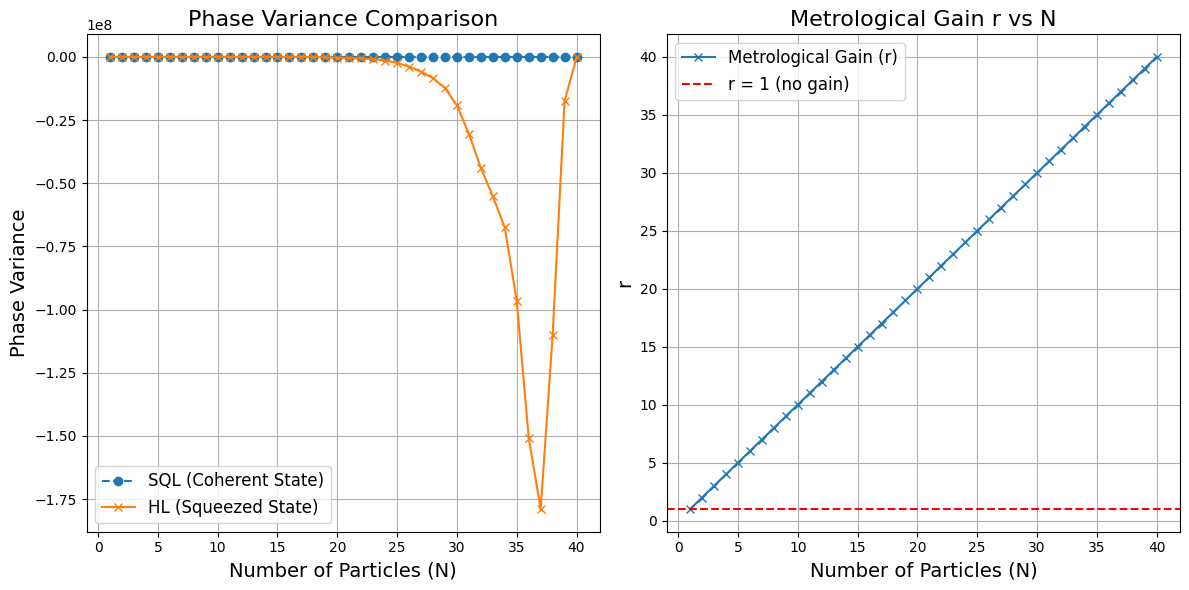

In [208]:
def plot_results(N_max, phase_variance_sql, phase_variance_hl, r_values):
    """
    Plot the phase variances and metrological gain r as a function of N.
    
    The scaling of phase variance and Fisher Information are discussed in Pezzé et al., Section III. [42†source].
    
    Parameters:
        N_max (int): Maximum number of particles.
        phase_variance_sql (np.array): Array of phase variances for SQL (Coherent State).
        phase_variance_hl (np.array): Array of phase variances for HL (Squeezed State).
        r_values (np.array): Array of metrological gain values.
    """
    plt.figure(figsize=(12, 6))

    # Plot phase variances
    plt.subplot(1, 2, 1)
    plt.plot(range(1, N_max+1), phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
    plt.plot(range(1, N_max+1), phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
    plt.title("Phase Variance Comparison", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("Phase Variance", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot metrological gain r
    plt.subplot(1, 2, 2)
    plt.plot(range(1, N_max+1), r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
    plt.title("Metrological Gain r vs N", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("r", fontsize=14)
    plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
N_max = 40
omega = 1.0
squeezing_strength = 0.5

# Calculate phase variances and r values
phase_variance_sql, phase_variance_hl, r_values = calculate_phase_variances(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total)

# Plot the results
plot_results(N_max, phase_variance_sql, phase_variance_hl, r_values)

In [36]:
# def find_Nopt_and_showcase(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total):
#     """
#     Find the optimal N (N_opt) where entanglement is no longer useful.
#     Plot results showing how entanglement loses its advantage beyond N_opt.
    
#     Parameters:
#         N_max (int): Maximum number of particles to consider.
#         omega (float): Frequency shift due to local oscillator.
#         squeezing_strength (float): The squeezing strength for HL strategy.
#         tau_prep_fraction (float): Fraction of total time spent in preparation.
#         tau_meas_fraction (float): Fraction of total time spent in measurement.
#         T_total (float): Total available time for the experiment (fixed).
#     """
    
#     # Calculate phase variances and r values for the given range of N
#     phase_variance_sql, phase_variance_hl, r_values = calculate_phase_variances(
#         N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total
#     )
    
#     # Find N_opt where entanglement stops being useful (r drops below 1)
#     N_opt = None
#     for N in range(1, N_max + 1):
#         if r_values[N - 1] < 1:
#             N_opt = N
#             break
    
#     # Plot the results
#     plt.figure(figsize=(12, 6))

#     # Plot phase variances
#     plt.subplot(1, 2, 1)
#     plt.plot(range(1, N_max+1), phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
#     plt.plot(range(1, N_max+1), phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
#     plt.title("Phase Variance Comparison", fontsize=16)
#     plt.xlabel("Number of Particles (N)", fontsize=14)
#     plt.ylabel("Phase Variance", fontsize=14)
#     plt.axvline(x=N_opt, color='r', linestyle='--', label=f"N_opt = {N_opt}")
#     plt.legend(fontsize=12)
#     plt.grid(True)

#     # # Plot metrological gain r
#     # plt.subplot(1, 2, 2)
#     # plt.plot(range(1, N_max+1), r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
#     # plt.title("Metrological Gain r vs N", fontsize=16)
#     # plt.xlabel("Number of Particles (N)", fontsize=14)
#     # plt.ylabel("r", fontsize=14)
#     # plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
#     # plt.axvline(x=N_opt, color='r', linestyle='--', label=f"N_opt = {N_opt}")
#     # plt.legend(fontsize=12)
#     # plt.grid(True)

#     plt.tight_layout()
#     plt.show()

#     if N_opt:
#         print(f"The optimal number of particles (N_opt) where entanglement stops being useful is: {N_opt}")
#     else:
#         print("Entanglement is beneficial for all N up to N_max.")

# # Parameters
# N_max = 40
# omega = 1.0
# squeezing_strength = 0.5
# T_total = 1.0  # Total available time for experiment
# tau_prep_fraction = 0.5   # Fraction of time for preparation
# tau_meas_fraction = 0.05  # Fraction of time for readout

# # Find N_opt and showcase the results
# find_Nopt_and_showcase(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total)


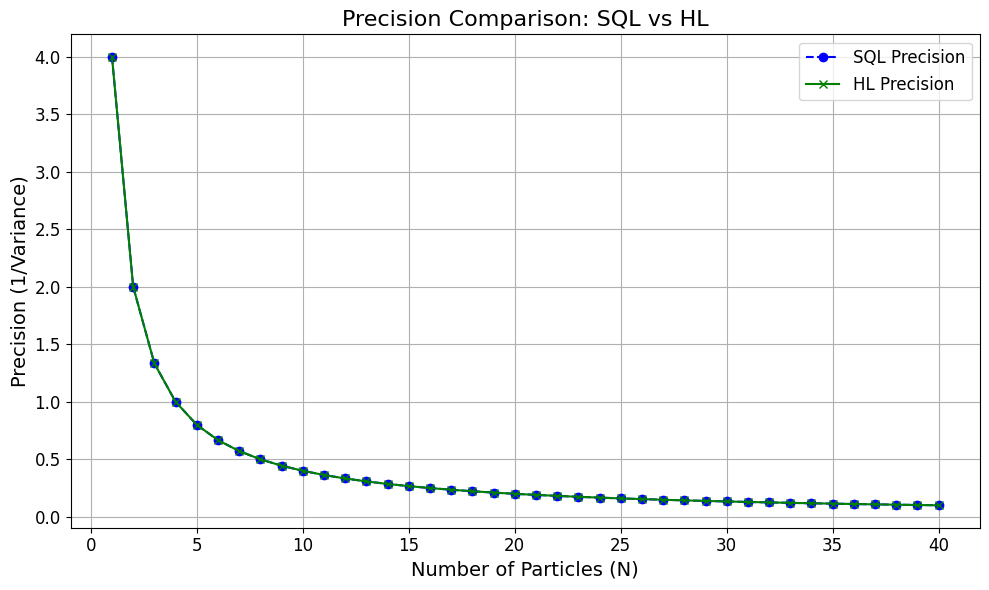

In [180]:
# Calculate precision as 1/variance
precision_sql = 1 / phase_variance_sql
precision_hl = 1 / phase_variance_hl

# Plot precision vs. N
plt.figure(figsize=(10, 6))
plt.plot(N_values, precision_sql, label="SQL Precision", linestyle='--', marker='o', color='blue')
plt.plot(N_values, precision_hl, label="HL Precision", linestyle='-', marker='x', color='green')

plt.title("Precision Comparison: SQL vs HL", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Precision (1/Variance)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


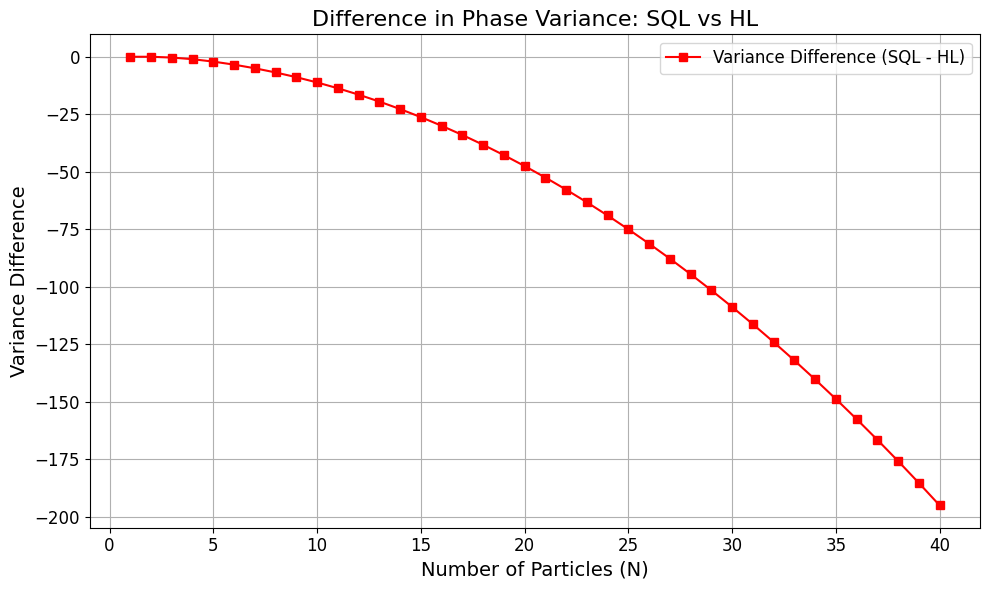

In [38]:
# Difference in variance (SQL - HL)
variance_diff = phase_variance_sql - phase_variance_hl

# Plot difference in variance
plt.figure(figsize=(10, 6))
plt.plot(N_values, variance_diff, label="Variance Difference (SQL - HL)", linestyle='-', marker='s', color='red')

plt.title("Difference in Phase Variance: SQL vs HL", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Variance Difference", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


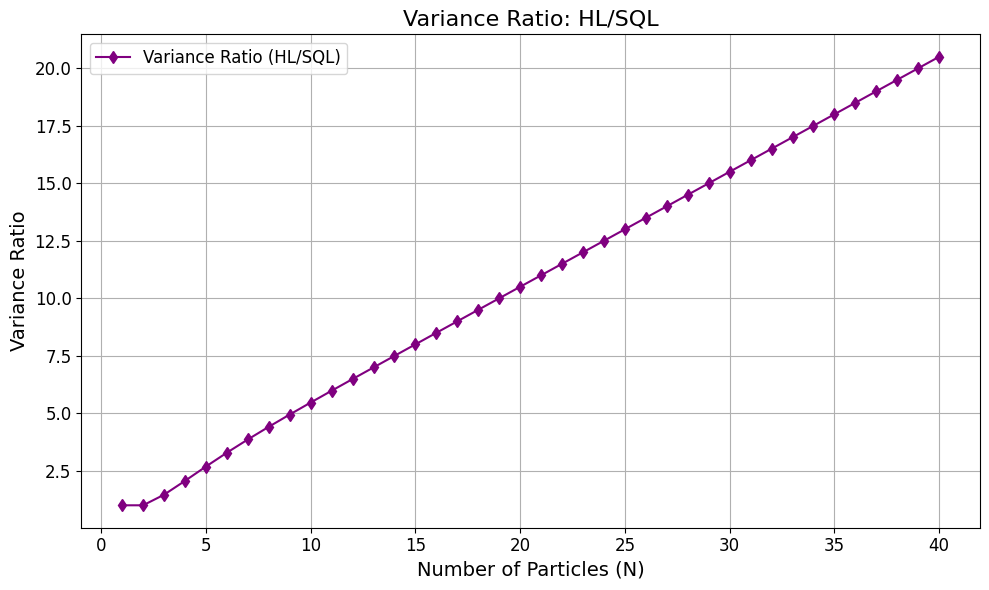

In [39]:
# Ratio of HL variance to SQL variance
variance_ratio = phase_variance_hl / phase_variance_sql

# Plot variance ratio
plt.figure(figsize=(10, 6))
plt.plot(N_values, variance_ratio, label="Variance Ratio (HL/SQL)", linestyle='-', marker='d', color='purple')

plt.title("Variance Ratio: HL/SQL", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Variance Ratio", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


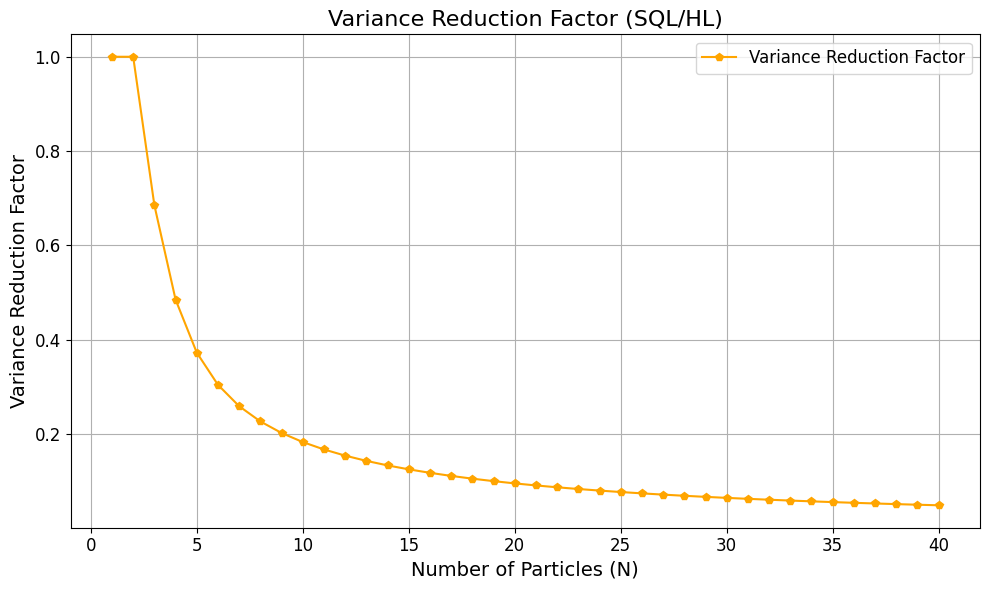

In [40]:
# Variance reduction factor: SQL variance / HL variance
variance_reduction_factor = phase_variance_sql / phase_variance_hl

# Plot variance reduction factor
plt.figure(figsize=(10, 6))
plt.plot(N_values, variance_reduction_factor, label="Variance Reduction Factor", linestyle='-', marker='p', color='orange')

plt.title("Variance Reduction Factor (SQL/HL)", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Variance Reduction Factor", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
